# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
#set up empty lists for required variables
City = []
Lat = []
Long = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

#output log wants count of cities so start count at 1
count=1

#Setup url - Temp in F - from site documentation
base_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key+"&q="

#print header as shown
print("Beginning Data Retrieval")
print("-"*29)

#loopage to get all cities
for city in cities:
    #query url including each city
    url=base_url+city
    #try statement in case city not found
    #request
    try:
        response=requests.get(url).json()
        #append all lists w/ proper data
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        #print processing statement
        print(f'Processing Record {count} of {len(cities)} | {city} ')
        #increase count 
        count=count+1
    except:
        print(f'City not found. Skipping...')    
#print line at end of loop
print("-"*29)
print("Beginning Data Retrieval")
print("-"*29)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 619 | buraydah 
Processing Record 2 of 619 | dunedin 
Processing Record 3 of 619 | busselton 
Processing Record 4 of 619 | adrar 
Processing Record 5 of 619 | mogadishu 
Processing Record 6 of 619 | taltal 
Processing Record 7 of 619 | anadyr 
Processing Record 8 of 619 | ugoofaaru 
Processing Record 9 of 619 | cape town 
Processing Record 10 of 619 | lebu 
Processing Record 11 of 619 | zhanjiang 
Processing Record 12 of 619 | castro 
Processing Record 13 of 619 | turbat 
Processing Record 14 of 619 | khatanga 
Processing Record 15 of 619 | longyearbyen 
Processing Record 16 of 619 | blagoyevo 
Processing Record 17 of 619 | mar del plata 
Processing Record 18 of 619 | yeniseysk 
Processing Record 19 of 619 | clyde river 
Processing Record 20 of 619 | inhambane 
City not found. Skipping...
Processing Record 21 of 619 | esperance 
Processing Record 22 of 619 | ushuaia 
Processing Record 23 of 619 | coihaique 
P

City not found. Skipping...
Processing Record 186 of 619 | mastic beach 
Processing Record 187 of 619 | cherskiy 
Processing Record 188 of 619 | kargasok 
Processing Record 189 of 619 | seymchan 
Processing Record 190 of 619 | bethel 
Processing Record 191 of 619 | san quintin 
City not found. Skipping...
Processing Record 192 of 619 | leningradskiy 
Processing Record 193 of 619 | norman wells 
Processing Record 194 of 619 | sinnamary 
Processing Record 195 of 619 | miramar 
Processing Record 196 of 619 | ustrzyki dolne 
Processing Record 197 of 619 | tyukhtet 
City not found. Skipping...
Processing Record 198 of 619 | dingle 
Processing Record 199 of 619 | ismailia 
Processing Record 200 of 619 | hokitika 
City not found. Skipping...
Processing Record 201 of 619 | ilulissat 
Processing Record 202 of 619 | alekseyevsk 
Processing Record 203 of 619 | paamiut 
Processing Record 204 of 619 | krasnyy yar 
Processing Record 205 of 619 | rudnogorsk 
Processing Record 206 of 619 | tashtagol 


Processing Record 373 of 619 | nadym 
Processing Record 374 of 619 | atar 
Processing Record 375 of 619 | porbandar 
Processing Record 376 of 619 | nyagan 
Processing Record 377 of 619 | padang 
Processing Record 378 of 619 | fuzhou 
Processing Record 379 of 619 | okato 
Processing Record 380 of 619 | tecoanapa 
Processing Record 381 of 619 | lasa 
Processing Record 382 of 619 | largo 
Processing Record 383 of 619 | ruteng 
Processing Record 384 of 619 | susanville 
Processing Record 385 of 619 | neuquen 
Processing Record 386 of 619 | qui nhon 
Processing Record 387 of 619 | neijiang 
City not found. Skipping...
Processing Record 388 of 619 | jiayuguan 
City not found. Skipping...
Processing Record 389 of 619 | leh 
Processing Record 390 of 619 | cururupu 
Processing Record 391 of 619 | monte alegre 
Processing Record 392 of 619 | veraval 
Processing Record 393 of 619 | garowe 
Processing Record 394 of 619 | arsenyev 
Processing Record 395 of 619 | kijang 
Processing Record 396 of 619

Processing Record 561 of 619 | guaira 
Processing Record 562 of 619 | pizarro 
Processing Record 563 of 619 | pandan 
Processing Record 564 of 619 | nemuro 
Processing Record 565 of 619 | bartica 
Processing Record 566 of 619 | manoel urbano 
-----------------------------
Beginning Data Retrieval
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
#Put all data in DF
weatherdict={ "City": City, "Lat": Lat, "Lng": Long, "Max Temp (F)": Max_Temp, "Humidity" : Humidity, 
            "Cloudiness": Cloudiness, "Windspeed (mph)": Wind_Speed, "Country": Country, "Date": Date}
weatherdf = pd.DataFrame(weatherdict)

#Write to csv file
weatherdf.to_csv(output_data_file)
weatherdf.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Windspeed (mph),Country,Date
0,Buraidah,26.33,43.98,93.20,38,20,3.36,SA,1595894004
1,Dunedin,-45.87,170.50,48.00,76,100,5.01,NZ,1595894514
2,Busselton,-33.65,115.33,48.00,98,8,8.72,AU,1595894515
3,Adrar,20.50,-10.07,95.31,23,30,14.29,MR,1595894515
4,Mogadishu,2.04,45.34,77.41,85,82,22.10,SO,1595894328


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
toohumid=weatherdf.loc[weatherdf['Humidity']>100]
toohumid

#This suggests there are no cities with humidity over 100% so skipping this step

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Windspeed (mph),Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


Some of the data (cloud cover or wind speed) is a variable that can change throughout the day and is reliant upon many other factors outside this study so plots should be used for general observations only when using those variables as we are only plotting one day of data. Further study over a larger time period would be needed for more meaningful analysis.

## Latitude vs. Temperature Plot

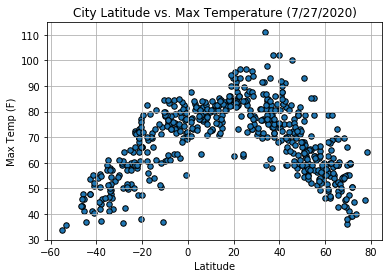

In [85]:
weatherdf.plot(kind='scatter', x="Lat", y="Max Temp (F)", edgecolors='k', s=30, grid=True)
plt.title("City Latitude vs. Max Temperature (7/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Images/city_latvsmaxtemp.png")
plt.show()

This plot is a representation of the maximum temperature (F) vs city latitude for 7/27/2020. As is expected for this date, the chart shows the northern hemisphere (latitudes > 0) has the highest temperatures as it is currently summer. We can see this very well by looking at the points around both positive and negative 20 to 40 latitudes. The positive latitude is experiencing some of the highest temperatures on the chart whereas the negative latitude is much lower. Also as is expected the points around the equator show warm temperatures with temperature dropping as the latitude increases toward both the North and South Poles. 

## Latitude vs. Humidity Plot

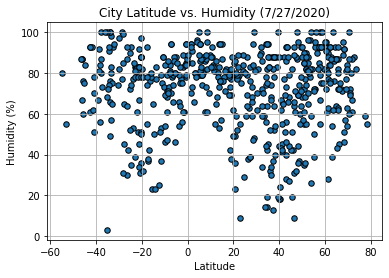

In [86]:
weatherdf.plot(kind='scatter', x="Lat", y="Humidity", edgecolors='k', s=30, grid=True)
plt.title("City Latitude vs. Humidity (7/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/city_latvshumid.png")
plt.show()

This plot is a representation of the humidity (%) vs city latitude for 7/27/2020. One main observation is that the majority of cities around the globe seem to exerience high humidity levels (> 70% Humidity). Most of the world's deserts are located between 20 to 40 degrees for both the north and south latitudes which can also be seen on this chart. The cities with the lowest humidities do appear to be grouped around 20 to 40 degrees for both the north and south hemispheres. While this second observation may not have a perfect correlation I do think its interesting that the lower humidity points do seem to be clustered between 20 to 40 degrees give or take. I beleive it is skewed a bit positive due to the time of year and tilt of the Earth's axis.

## Latitude vs. Cloudiness Plot

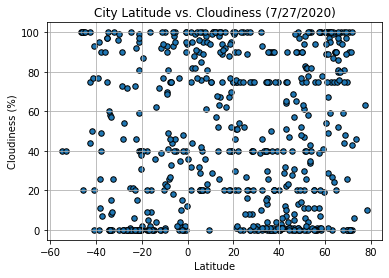

In [87]:
weatherdf.plot(kind='scatter', x="Lat", y="Cloudiness", edgecolors='k', s=30, grid=True)
plt.title("City Latitude vs. Cloudiness (7/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/city_latvscloud.png")
plt.show()

This plot is a representation of the cloudiness percent vs city latitude for 7/27/2020. There is a fairly even spread of data across both axis for all latitudes and varying cloudiness percents. I have heard on average the Earth has about 50% cloud cover for any given moment. Seeing this chart seems to back that statistic up as there is such a good spread of data points across the whole plot. Further analysis of this data would be interesting to show how cloud coverage changes day to day for certain areas.

## Latitude vs. Wind Speed Plot

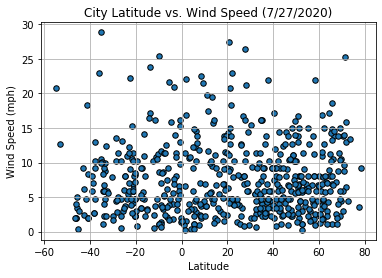

In [88]:
weatherdf.plot(kind='scatter', x="Lat", y="Windspeed (mph)", edgecolors='k', s=30, grid=True)
plt.title("City Latitude vs. Wind Speed (7/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/city_latvswind.png")
plt.show()

This plot is a representation of the wind speed (mph) vs city latitude for 7/27/2020. In general it appears the majority of cities appear to experience wind speeds below 15mph. The data is also spread fairly evenly across all the latitudes suggesting that wind speed is fairly similar everywhere around the world. Further analysis could be run on the outlier cities (wind speeds > 15 mph) to see if this higher wind speed is normal for that area or if it is due to a storm in the area causing anamalous data.

## Linear Regression

In [94]:
# OPTIONAL: Create a function to create Linear Regression plots

def regressplots(x_values, y_values, y_label, title, file_name, lineposition):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r--")
    plt.annotate(line_eq, lineposition, fontsize=15, color ='r')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}.")
    plt.savefig(f"Images/{file_name}.png")
    plt.show()

In [63]:
# Create Northern and Southern Hemisphere DataFrames
northerndf=weatherdf.loc[weatherdf["Lat"]>0]
southerndf=weatherdf.loc[weatherdf["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4827330285128601.


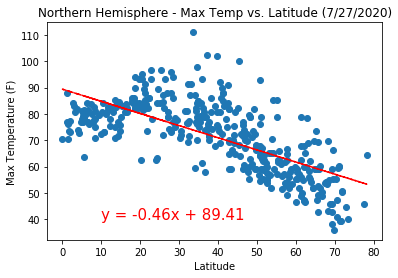

In [96]:
x_values = northerndf["Lat"]
y_values = northerndf["Max Temp (F)"]
y_label = "Max Temperature (F)"
title = "Northern Hemisphere - Max Temp vs. Latitude (7/27/2020)"
file_name = "northhem_latvstemp"
lineposition = (10,40)

regressplots(x_values, y_values, y_label, title, file_name, lineposition)

This plot is a representation of the maximum temperature (F) vs city latitude for 7/27/2020 for the Northern Hemisphere. The Northern Hemisphere is currently experiencing summer which is apparent in the figure as outliers are almost all for higher temperatures. In general, the plot behaves as expected with warm temperatures being seen at lower latitudes near the equator and then dropping as latitude increases toward the North Pole. Due to the time of year the r-squared value is lower than expected. For the Northern Hemisphere, this is currently the part of the year where some of the warmest temperatures are seen which is shown clearly in the data. As temperatures are higher than average for the Northern Hemisphere at this particular time of year the data is slighly skewed toward higher temperatures which is causing a lower correlation r squared value. I expect that further analysis during a time of year when both hemispheres are not experiencing the highest and lowest temperatures of the year would provide a better correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6117794826893852.


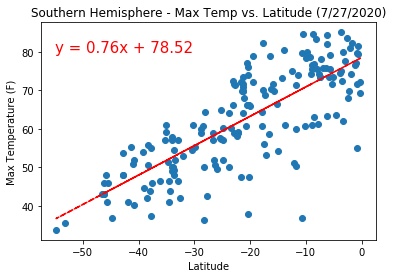

In [100]:
x_values = southerndf["Lat"]
y_values = southerndf["Max Temp (F)"]
y_label = "Max Temperature (F)"
title = "Southern Hemisphere - Max Temp vs. Latitude (7/27/2020)"
file_name = "southhem_latvstemp"
lineposition = (-55,80)

regressplots(x_values, y_values, y_label, title, file_name, lineposition)

This plot is a representation of the maximum temperature (F) vs city latitude for 7/27/2020 for the Southern Hemisphere. The Southern Hemisphere is currently experiencing winter which is apparent in the figure as outliers are almost all for lower temperatures. In general, the plot behaves as expected with warmest temperatures being seen at lower latitudes near the equator and then dropping as latitude decreases toward the South Pole. Due to the time of year the r-squared value is lower than expected. For the Southern Hemisphere, this is currently the part of the year where some of the coldest temperatures are seen which is shown clearly in the data. As temperatures are lower than average for the Southern Hemisphere at this particular time of year the data is slighly skewed toward lower temperatures which is causing a lower correlation r squared value.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002605086196649047.


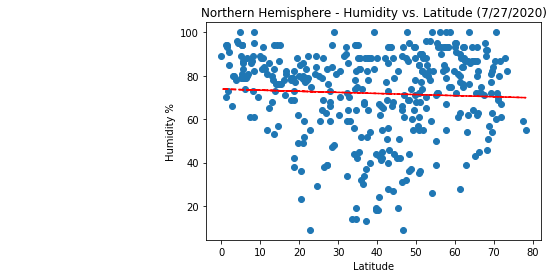

In [113]:
x_values = northerndf["Lat"]
y_values = northerndf["Humidity"]
y_label = "Humidity %"
title = "Northern Hemisphere - Humidity vs. Latitude (7/27/2020)"
file_name = "northhem_latvshumid"
lineposition = (-55,10)

regressplots(x_values, y_values, y_label, title, file_name, lineposition)

This plot is a representation of the humidity (%) vs city latitude for 7/27/2020 for the Northern Hemisphere. As seen on the plot our data is very scattered giving us a very low r-squared value. One main observation is that the majority of cities in the Northern Hemisphere seem to exerience higher humidity levels (> 60% Humidity). For these higher humidity levels the data appears to be evenly spread across the latitudes suggesting most areas experience similar humidity levels in this range. This does change once we get into the lower humidity outliers. It appears that between 20 to 50 degrees latitude is where most of cities with lower humidity values are located. This is roughly the range of latitudes where deserts are most common on Earth. Deserts are also more common in the Northern Hemisphere which could account for the high number of outliers. Further analysis would be needed to explore the correlation with desert location and humidity to see if that is the cause of these outliers or if it is due to another unrelated factor.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00276135727219641.


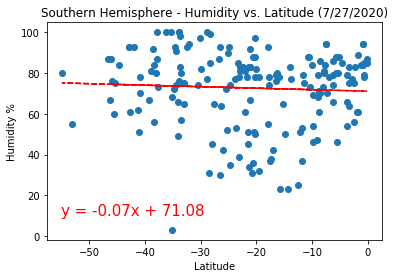

In [104]:
x_values = southerndf["Lat"]
y_values = southerndf["Humidity"]
y_label = "Humidity %"
title = "Southern Hemisphere - Humidity vs. Latitude (7/27/2020)"
file_name = "southhem_latvshumid"
lineposition = (-55,10)

regressplots(x_values, y_values, y_label, title, file_name, lineposition)

This plot is a representation of the humidity (%) vs city latitude for 7/27/2020 for the Southern Hemisphere. As seen on the plot our data is very scattered giving us a very low r-squared value. One main observation is that the majority of cities in the Southern Hemisphere seem to exerience higher humidity levels (> 80% Humidity). This appears to be higher than average when compared to the Northern Hemisphere. For these higher humidity levels the data appears to be evenly spread across the latitudes suggesting most areas experience similar humidity levels in this range. This does change once we get into the lower humidity outliers. It appears that between -10 to -30 degrees latitude is where most of cities with lower humidity values are located. This is roughly the range of latitudes where deserts are most common on Earth. Deserts are also more common in the Northern Hemisphere which could account for the lower number of outliers on this plot as compared to the plot above. Further analysis would be needed to explore the correlation with desert location and humidity to see if that is the cause of these outliers or if it is due to another unrelated factor.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0057449073656430805.


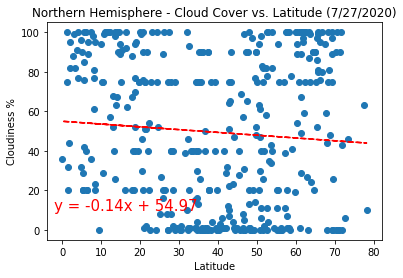

In [112]:
x_values = northerndf["Lat"]
y_values = northerndf["Cloudiness"]
y_label = "Cloudiness %"
title = "Northern Hemisphere - Cloud Cover vs. Latitude (7/27/2020)"
file_name = "northhem_latvscloud"
lineposition = (-2,10)

regressplots(x_values, y_values, y_label, title, file_name, lineposition)

This plot is a representation of the cloudiness percent vs city latitude for 7/27/2020 for the Northern Hemisphere. There is a fairly even spread of data across both axis for all latitudes and varying cloudiness percents. This is also seen in the r-squared value as it is very low. This chart backs up the statistic that the earth has about 50% cloud cover at any given time. The Southern Hemisphere plot will likely look similar.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007248361948909882.


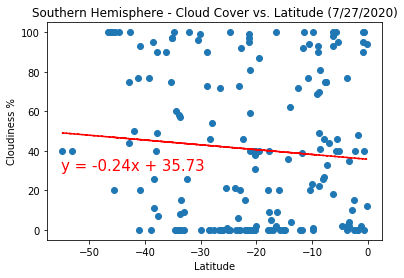

In [116]:
x_values = southerndf["Lat"]
y_values = southerndf["Cloudiness"]
y_label = "Cloudiness %"
title = "Southern Hemisphere - Cloud Cover vs. Latitude (7/27/2020)"
file_name = "southhem_latvscloud"
lineposition = (-55,30)

regressplots(x_values, y_values, y_label, title, file_name, lineposition)

This plot is a representation of the cloudiness percent vs city latitude for 7/27/2020 for the Southern Hemisphere. There is a fairly even spread of data across both axis for all latitudes and varying cloudiness percents. This is also seen in the r-squared value as it is very low. This chart backs up the statistic that the earth has about 50% cloud cover at any given time. The Southern Hemisphere plot does look similar to the Northern Hemisphere plot. It appears there are less points as I have a larger majority of randomly picked citites for the Northern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00019841551106986827.


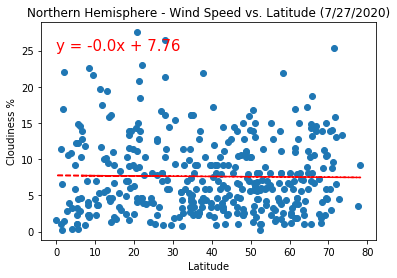

In [118]:
x_values = northerndf["Lat"]
y_values = northerndf["Windspeed (mph)"]
y_label = "Cloudiness %"
title = "Northern Hemisphere - Wind Speed vs. Latitude (7/27/2020)"
file_name = "northhem_latvswind"
lineposition = (0,25)

regressplots(x_values, y_values, y_label, title, file_name, lineposition)

This plot is a representation of the wind speed (mph) vs city latitude for 7/27/2020 for the Northern Hemisphere. In general it appears the majority of cities appear to experience wind speeds below 15mph. The data is also spread fairly evenly across all the latitudes suggesting that wind speed is fairly similar everywhere around the world. This is also represented by the very low r-squared value. Further analysis could be run on the outlier cities (wind speeds > 15 mph) to see if this higher wind speed is normal for that area or if it is due to a storm in the area causing anamalous data. I expect this data to be similar for the Southern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0021214222067034013.


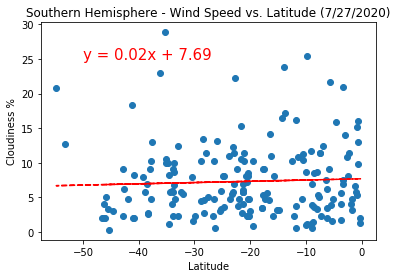

In [120]:
x_values = southerndf["Lat"]
y_values = southerndf["Windspeed (mph)"]
y_label = "Cloudiness %"
title = "Southern Hemisphere - Wind Speed vs. Latitude (7/27/2020)"
file_name = "southhem_latvswind"
lineposition = (-50,25)

regressplots(x_values, y_values, y_label, title, file_name, lineposition)

This plot is a representation of the wind speed (mph) vs city latitude for 7/27/2020 for the Southern Hemisphere. In general it appears the majority of cities appear to experience wind speeds below 15mph. The data is also spread fairly evenly across all the latitudes suggesting that wind speed is fairly similar everywhere around the world. This is also represented by the very low r-squared value. Further analysis could be run on the outlier cities (wind speeds > 15 mph) to see if this higher wind speed is normal for that area or if it is due to a storm in the area causing anamalous data. This data is similar to the plot for the Northern Hemisphere as was expected.